In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [4]:
#get data
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

In [5]:
#check stationarity
perform_adf_test(series)

ADF Statistic: -7.162321
p-value: 0.000000


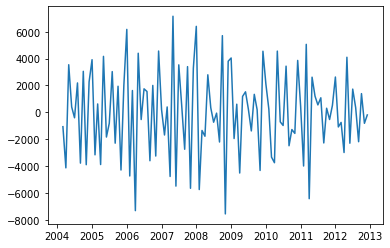

In [6]:
plt.plot(series)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


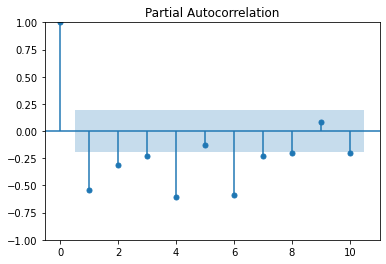

In [7]:
plot_pacf(series, lags=10)
plt.show()

# Either AR(1), AR(4), AR(6), or AR(10)

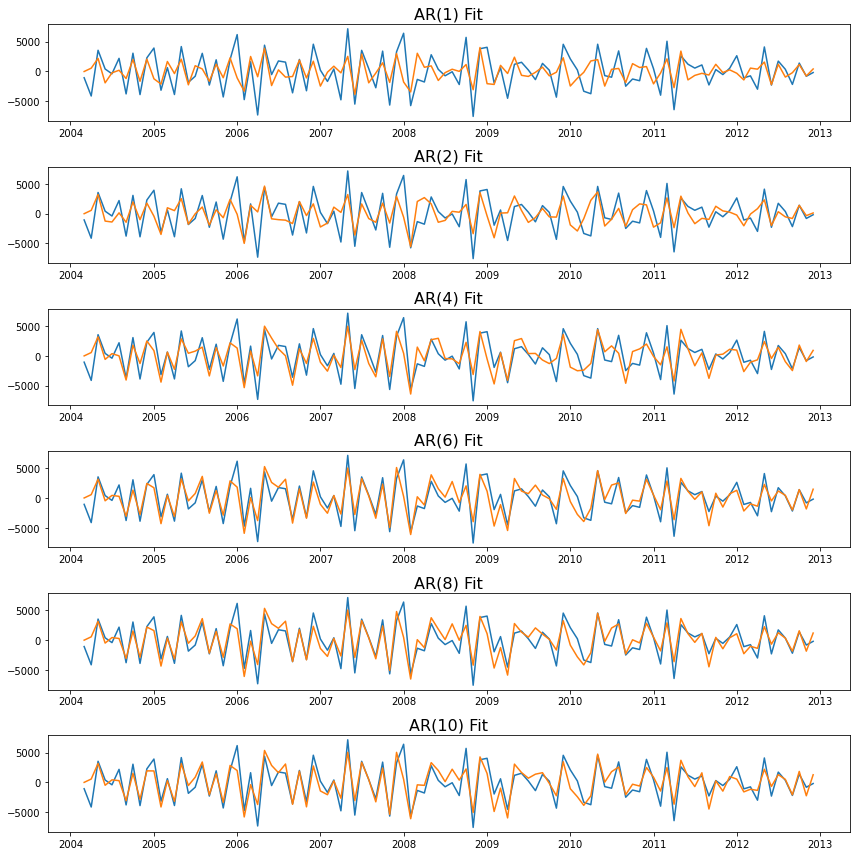

In [9]:
plt.figure(figsize=(12,12))

ar_orders = [1, 2, 4, 6, 8, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(6,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

# Each model has:
## **_l_**: a log likelihood
## **_k_**: a number of parameters 
## **_n_**: a number of samples used for fitting

# $AIC: 2k-2l$

## Lower AIC via higher log likelihood or less parameters

# $BIC: \ln(n)k-2l$

## Lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [10]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.860621744531
AIC for AR(2): 1972.3866439077356
AIC for AR(4): 1927.609985266039
AIC for AR(6): 1899.6497442329617
AIC for AR(8): 1901.9294741005133
AIC for AR(10): 1902.376545004112


### Based on AIC criteria, pick AR(6)

In [11]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8509390268673
BIC for AR(2): 1983.0404002841838
BIC for AR(4): 1943.5906198307114
BIC for AR(6): 1920.9572569858583
BIC for AR(8): 1928.563865041634
BIC for AR(10): 1934.3378141334567


### Based on BIC criteria, pick AR(6)